In [1]:
from datetime import datetime


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\prach\OneDrive\Desktop\20BCS1334_2\100_days\covidDataset.csv").drop(["SNo"],axis=1)
df.head()


,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ObservationDate  236017 non-null  object
 1   Province/State   173972 non-null  object
 2   Country/Region   236017 non-null  object
 3   Last Update      236017 non-null  object
 4   Confirmed        236017 non-null  int64 
 5   Deaths           236017 non-null  int64 
 6   Recovered        236017 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 12.6+ MB


# Making object to datetime

In [5]:
df['ObservationDate'] =  pd.to_datetime(df['ObservationDate'],dayfirst=True)
df['Last Update'] = pd.to_datetime(df['Last Update']).dt.date


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ObservationDate  236017 non-null  datetime64[ns]
 1   Province/State   173972 non-null  object        
 2   Country/Region   236017 non-null  object        
 3   Last Update      236017 non-null  object        
 4   Confirmed        236017 non-null  int64         
 5   Deaths           236017 non-null  int64         
 6   Recovered        236017 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 12.6+ MB


In [7]:
new=df.copy()


In [8]:
new.rename({"Country/Region":"Country","Province/State":"Province"},axis=1,inplace=True)

In [9]:
new.isnull().sum()

ObservationDate        0
Province           62045
Country                0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

# Replacing NaN values by Not Found

In [10]:
new.fillna("Not Found",inplace=True)

In [11]:
grp=new.groupby("Country")

In [12]:
grp

In [13]:
grp.groups

{' Azerbaijan': [2663], '('St. Martin',)': [4674], 'Afghanistan': [2258, 2351, 2452, 2556, 2664, 2782, 2910, 3041, 3189, 3348, 3519, 3705, 3919, 4115, 4373, 4643, 4853, 5077, 5378, 5534, 5779, 6037, 6324, 6607, 6900, 7196, 7502, 7617, 7918, 8215, 8516, 8821, 9130, 9440, 9754, 10068, 10383, 10699, 11015, 11333, 11651, 11970, 12291, 12613, 12935, 13257, 13579, 13902, 14225, 14547, 14869, 15191, 15513, 15835, 16157, 16479, 16801, 17123, 17445, 17766, 18088, 18407, 18726, 19045, 19368, 19691, 20014, 20339, 20664, 20989, 21314, 21639, 21964, 22289, 22614, 22939, 23264, 23589, 23914, 24239, 24565, 24944, 25323, 25702, 26081, 26460, 26840, 27294, 27748, 28202, 28656, 29110, 29564, 30018, 30472, 31027, 31583, 32140, 32697, 33363, ...], 'Albania': [4402, 4619, 4828, 5027, 5190, 5484, 5740, 6003, 6285, 6562, 6856, 7157, 7459, 7618, 7919, 8216, 8517, 8822, 9131, 9441, 9755, 10069, 10384, 10700, 11016, 11334, 11652, 11971, 12292, 12614, 12936, 13258, 13580, 13903, 14226, 14548, 14870, 15192, 15514

In [14]:
grp.count()

,ObservationDate,Province,Last Update,Confirmed,Deaths,Recovered
Country,,,,,,
Azerbaijan,1,1,1,1,1,1
"('St. Martin',)",1,1,1,1,1,1
Afghanistan,370,370,370,370,370,370
Albania,356,356,356,356,356,356
Algeria,369,369,369,369,369,369
...,...,...,...,...,...,...
West Bank and Gaza,339,339,339,339,339,339
Yemen,324,324,324,324,324,324
Zambia,347,347,347,347,347,347


In [15]:
cases=grp.get_group("Mainland China")
cases.columns

Index(['ObservationDate', 'Province', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [16]:
cases

,ObservationDate,Province,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,2020-01-22,1,0,0
1,2020-01-22,Beijing,Mainland China,2020-01-22,14,0,0
2,2020-01-22,Chongqing,Mainland China,2020-01-22,6,0,0
3,2020-01-22,Fujian,Mainland China,2020-01-22,1,0,0
4,2020-01-22,Gansu,Mainland China,2020-01-22,0,0,0
...,...,...,...,...,...,...,...
235928,2021-02-27,Tibet,Mainland China,2021-02-28,1,0,1
235956,2021-02-27,Unknown,Mainland China,2021-02-28,0,0,2
236000,2021-02-27,Xinjiang,Mainland China,2021-02-28,980,3,977
236008,2021-02-27,Yunnan,Mainland China,2021-02-28,233,2,229


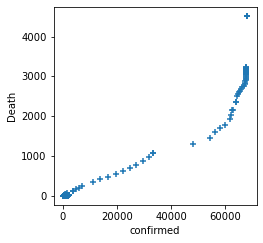

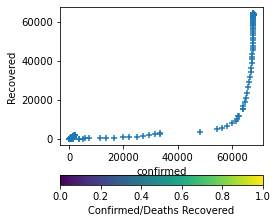

In [17]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.scatter(x=cases["Confirmed"], y=cases["Deaths"],marker="+")
plt.xlabel("confirmed")
plt.ylabel("Death")
plt.figure(figsize=(8,8))
plt.subplot(2,2,2)
plt.scatter(x=cases["Confirmed"], y=cases["Recovered"],marker="+")
plt.xlabel("confirmed")
plt.ylabel("Recovered")

plt.colorbar(label="Confirmed/Deaths Recovered", orientation="horizontal")

# *Before removing the outliers

(array([1.2107e+04, 3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 5.0000e+00, 7.0000e+00, 1.7000e+01, 2.4000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.1700e+02]),
 array([   0. ,  225.6,  451.2,  676.8,  902.4, 1128. , 1353.6, 1579.2,
        1804.8, 2030.4, 2256. , 2481.6, 2707.2, 2932.8, 3158.4, 3384. ,
        3609.6, 3835.2, 4060.8, 4286.4, 4512. ]),
 <BarContainer object of 20 artists>)

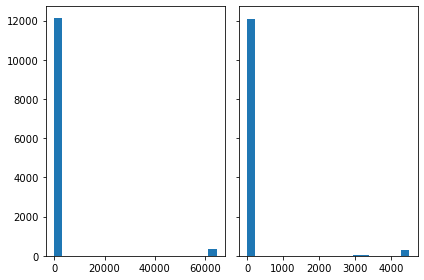

In [18]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(cases["Recovered"],bins=20)
axs[1].hist(cases["Deaths"],bins=20)




In [42]:
cases.shape

(12500, 7)

In [19]:
print(cases['Recovered'].quantile(0.10))
print(cases['Recovered'].quantile(0.90))

18.0
1262.1000000000004


In [20]:
cases["Recovered"] = np.where(cases["Recovered"] <18, 18,cases['Recovered'])
cases["Recovered"] = np.where(cases["Recovered"] >1262.1, 1262.10,cases['Recovered'])

<ipython-input-20-f72f08e454ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases["Recovered"] = np.where(cases["Recovered"] <18, 18,cases['Recovered'])
<ipython-input-20-f72f08e454ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases["Recovered"] = np.where(cases["Recovered"] >1262.1, 1262.10,cases['Recovered'])


In [21]:
print(cases['Deaths'].quantile(0.10))
print(cases['Deaths'].quantile(0.90))

0.0
9.0


In [22]:
cases.loc[:,["Deaths"]] = np.where(cases["Deaths"] <0, 0,cases['Deaths'])
cases.loc[:,["Deaths"]] = np.where(cases["Deaths"] >9, 9,cases['Deaths'])

C:\Users\prach\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\prach\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Text(0.5, 0, 'Deaths')

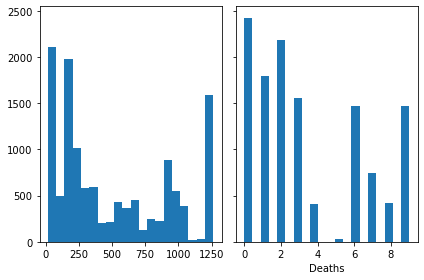

In [32]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(cases["Recovered"],bins=20)
axs[1].hist(cases["Deaths"],bins=20)

plt.xlabel("Deaths")


In [45]:
# x=np.arange(len(cases["Confirmed"]))
# plt.figure(figsize=(10,10))
# plt.bar(x+0.0,cases["Confirmed"],width=5,color='b')
# plt.bar(x+5,cases["Deaths"],width=5,color='g')
# plt.bar(x+10,cases["Recovered"],width=5,color='r')
# plt.show()

# Doing some analytical analysis

In [25]:
grp2=new.groupby("Country",sort=False).agg(np.mean)

In [26]:
grp2

,Confirmed,Deaths,Recovered
Country,,,
Mainland China,2607.305840,133.439680,2328.892960
Hong Kong,3979.585608,65.796526,3515.220844
Macau,40.109181,0.000000,36.595533
Taiwan,488.702233,5.950372,420.188586
US,149160.903550,3365.158885,23454.056286
...,...,...,...
Lesotho,2518.116838,53.604811,952.085911
Solomon Islands,14.935252,0.000000,6.870504
Marshall Islands,3.577236,0.000000,2.991870


In [40]:
print("The details of Country with highest covid cases : ",grp2.iloc[grp2["Confirmed"].argmax()])

The details of Country with highest covid cases :  Confirmed    717519.155367
Deaths         9998.511299
Recovered    642672.878531
Name: Turkey, dtype: float64


In [46]:
print("The details of Country with lowest covid cases : ",grp2.iloc[grp2["Confirmed"].argmin()])

The details of Country with lowest covid cases :  Confirmed    0.166667
Deaths       0.000000
Recovered    0.000000
Name: Republic of the Congo, dtype: float64
